In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

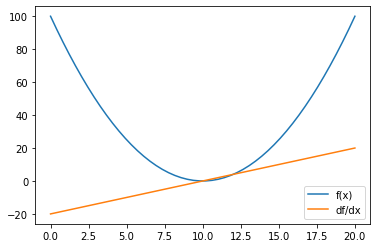

In [2]:
# create function
x = Symbol('x')
f = (x-10)**2

# derivative
df = f.diff(x)

# lambdify both
f = lambdify(x, f)
df = lambdify(x, df)

# evaluate
pts = np.linspace(0, 20)
plt.plot(pts, f(pts), label='f(x)')
plt.plot(pts, df(pts), label='df/dx')
plt.legend()
plt.show()

In [3]:
max_iter = 300
lr = 0.05

In [4]:
X0 = 30
cur_iter = 0
steps = [X0]

while True:
    # get closer to a local min
    X1 = X0 - lr * df(X0)
    # save step
    steps.append(X1)
    # calculate step size
    step_size = abs(X0 - X1)
    # save new step
    X0 = X1
    if cur_iter > max_iter:
        print("Max iter reached")
        break
    if step_size < 0.00001:
        print("Local min reached")
        break
    elif cur_iter%20 == 0:
        print("Iteration {} has x value {}".format(cur_iter, X1))
    cur_iter = cur_iter + 1
        
    
print("The local minimum occurs at", X1)

Iteration 0 has x value 28.0
Iteration 20 has x value 12.188379782630246
Iteration 40 has x value 10.266055892945824
Iteration 60 has x value 10.032346185398458
Iteration 80 has x value 10.003932541009512
Iteration 100 has x value 10.000478105179978
Local min reached
The local minimum occurs at 10.000088593855091


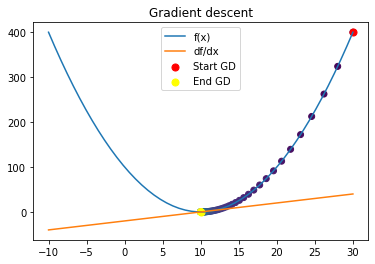

In [6]:
pts = np.linspace(-10, 30)
plt.plot(pts, f(pts), label='f(x)')
plt.plot(pts, df(pts), label='df/dx')
# change color to see GD progress
color = [item/255 for item in list(range(len(steps)))]
plt.scatter(steps, [f(x) for x in steps], c=color)
plt.scatter(steps[0], f(steps[0]), label='Start GD', c='red', s=50)
plt.scatter(steps[-1], f(steps[-1]), label='End GD', c='yellow', s=50)
plt.title('Gradient descent')
plt.legend()
plt.show()